# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [16]:
# !pip install pandas
# !pip install matplotlib

Import pandas module


In [17]:
import pandas as pd

Import matplotlib


In [18]:
import matplotlib.pyplot as plt

## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [19]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:


Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [20]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


Types of Duplicates:
- Exact Duplicates: Entire rows that are completely identical across all columns.
- Partial Duplicates: Rows where only certain key columns (, , ) are identical, but other columns may have different values. `MainBranch`, `Employment`, `RemoteWork`

In [21]:
# 1. Count the number of duplicate rows in dataset.
# Check for duplicates across all columns (default): df.duplicated(subset=None, keep='first') or df.duplicated()
# If you want to check for duplicates in specific columns, you can pass a subset of columns
# keep='first': By default, it keeps the first occurrence of a duplicate row and marks subsequent duplicates as True.
duplicate_count = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_count}')


Number of duplicate rows: 20


In [22]:
# 2. Display the first 5 duplicates rows
duplicates = df[df.duplicated(keep=False)] # keep=False: Marks all occurrences of duplicates as True, so you can see all instances of a duplicated row.
print(duplicates.head())  # Display the first few duplicate rows



   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

#### The keep parameter in .duplicated() does not mean keeping the duplicates in the dataset. Instead, it controls which occurrences of duplicate values are marked as True (indicating they are duplicates) or False (indicating they are unique).

When you run: uplicates = df[df.duplicated(keep=False)]
it creates a boolean mask where:
- True means the row is considered a duplicate.
- False means the row is the first occurrence (or unique).

The keep parameter does not mean "keep" the duplicates in the dataset. It controls which duplicate rows are marked as True (indicating they are duplicates) in the .duplicated() method.

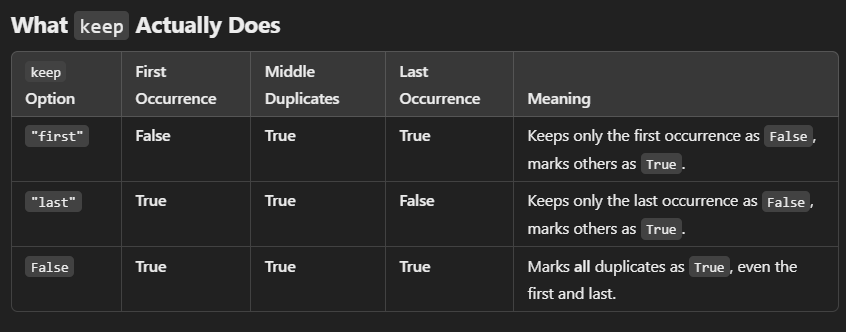

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


#### Key Reasons to Identify Duplicates Based on Selected Columns
- Identifying duplicates using selected columns excludes unnecessary variations (like IDs).
- It helps find meaningful duplicate records and removes redundant data.
- It ensures accurate analysis, better data quality, and fair machine learning models.

We can now decide whether to remove or merge these duplicates for better analysis.

1. Identify Duplicate Rows Based on Selected Columns

Filter the dataset to find duplicates based on MainBranch, Employment, and RemoteWork:

In [23]:
# Identify duplicate rows based on selected columns
grouping_cols = ['MainBranch', 'Employment', 'RemoteWork']
duplicates = df[df.duplicated(grouping_cols, keep=False)]

# Find which columns have identical values within these duplicate rows
identical_counts = (duplicates.groupby(grouping_cols)
                    .nunique() == 1).sum(axis=0)

# Sort columns by how often they have identical values
identical_counts = identical_counts.sort_values(ascending=False)

# Display results
print("Columns frequently identical within duplicates:\n")
print(identical_counts)

Columns frequently identical within duplicates:

Check                    319
ICorPM                    97
AIThreat                  88
SOAccount                 85
AINextLess integrated     76
                        ... 
TechEndorse                8
YearsCodePro               8
BuyNewTool                 7
CodingActivities           1
ResponseId                 0
Length: 111, dtype: int64


#### Interpret the output

The output shows how many times each column within the `duplicates` DataFrame has entirely identical values within groups defined by `MainBranch`, `Employment`, and `RemoteWork`. Let's break down the interpretation:

1. **`duplicates` DataFrame:** This DataFrame contains only the rows that are duplicates based on the combination of 'MainBranch', 'Employment', and 'RemoteWork'.  The `keep=False` in `df.duplicated()` ensures that *all* duplicate rows are kept in `duplicates`, not just the first or last occurrence.

2. **Grouping and `nunique()`:** The code groups these duplicate rows by the specified columns (MainBranch, Employment, RemoteWork) and then calculates the number of unique values within each group for *each column*.

3. **`== 1` and `sum()`:** The code checks which columns have only one unique value (meaning all values are identical) within each group. The `.sum()` then counts how many times this happens for each column across all groups.

4. **Sorting:** The `sort_values(ascending=False)` sorts the resulting counts in descending order, so the columns that most frequently have identical values within the duplicate groups appear at the top.

5. **Output Interpretation:**
   - `Check  319`: The 'Check' column has identical values within its corresponding group 319 times. This means that in 319 out of all the duplicate groups, every row within those groups has the *same* value for the 'Check' column.
   - `ICorPM 97`:  The 'ICorPM' column has identical values within its corresponding group 97 times.
   - ...
   - `CodingActivities 1`: The 'CodingActivities' column has identical values within its group only once.
   - `ResponseId 0`: The 'ResponseId' column *never* has identical values within any of the duplicate groups.  This suggests that 'ResponseId' might be a unique identifier or at least varies within groups defined by the grouping columns.

**In summary:** The output provides a measure of how much each column tends to be the same within groups of rows that are otherwise considered duplicates based on the chosen grouping columns. A higher count indicates that the column is more likely to have identical values within the groups of duplicates, potentially suggesting redundancy or strong correlation with the grouping variables. A lower count (especially 0) indicates that the column varies more within these groups, suggesting that it carries more distinguishing information even among rows that are duplicated based on the grouping columns.


This information can be helpful for:

* **Data cleaning:** Identifying highly redundant columns that might be candidates for removal.
* **Feature engineering:** Understanding which columns are strongly correlated with your grouping variables and might be useful in creating new, combined features.
* **Data analysis:**  Gaining insights into the relationships between variables, especially within subsets of your data defined by the grouping columns.


2. Analyze Columns with Identical Values Within Duplicates
Now, check which columns frequently contain identical values across the duplicate rows.

You can analyze the identical_counts Series resulting from your code to determine which columns frequently contain identical values within the duplicate groups. Here's a breakdown of how to do that and interpret the results:

Understanding the identical_counts Series:

As a reminder, your code produces a Pandas Series called identical_counts. The index of this Series contains the column names, and the values represent the number of times each column had completely identical values within the groups of duplicate rows (defined by 'MainBranch', 'Employment', and 'RemoteWork').

Identifying Frequently Identical Columns:

- Threshold: You'll need to decide on a threshold to define "frequently." This depends on the size of your dataset and the context of your analysis. For example, you could consider columns with counts above the 75th percentile, the 90th percentile, or a specific absolute number (e.g., counts greater than 100) as frequently identical.

- Filtering: Use the identical_counts Series to filter for columns meeting your threshold.

- Absolute Number:

In [ ]:
# decide on a threshold to define "frequently."
# Filtering: Use the identical_counts Series to filter for columns meeting your threshold.

threshold_count = 90 # Example: Counts greater than 100
frequent_cols = identical_counts[identical_counts >= threshold_count]

# Displaying Results: Print the frequent_cols Series to see the columns that meet your criteria:
print("Frequently Identical Columns:")
print(frequent_cols)

Frequently Identical Columns:
Check     319
ICorPM     97
dtype: int64


##### Interpreting the Results:

The columns in frequent_cols are the ones that very often have identical values within groups defined by your 'MainBranch', 'Employment', and 'RemoteWork'. This could indicate a few things:

- Redundancy: The columns might be redundant or contain information that's already captured by the grouping columns. You could consider removing these columns to simplify your dataset.

- Strong Correlation: The columns are strongly related to the grouping variables. This might be valuable information for feature engineering or further analysis.

- Data Entry Issues: If unexpected columns appear frequently identical, it could indicate a data entry problem or an issue with how the data was collected.

##### Next Steps:

- Investigate: Examine the frequently identical columns more closely to understand why they have so many identical values within the duplicate groups.

- Domain Knowledge: Use your domain expertise to determine whether these columns are truly redundant or if they provide valuable information despite appearing frequently identical.

- Data Cleaning/Feature Engineering: Based on your investigation, decide whether to remove redundant columns, combine correlated columns into new features, or keep the columns for further analysis.

By following these steps, you can effectively analyze the identical_counts output to gain valuable insights into your data and improve your data cleaning and feature engineering processes. Remember to choose a threshold appropriate for your dataset and interpret the results in the context of your specific problem.

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


1. Create visualizations to show the distribution of duplicates across different categories.

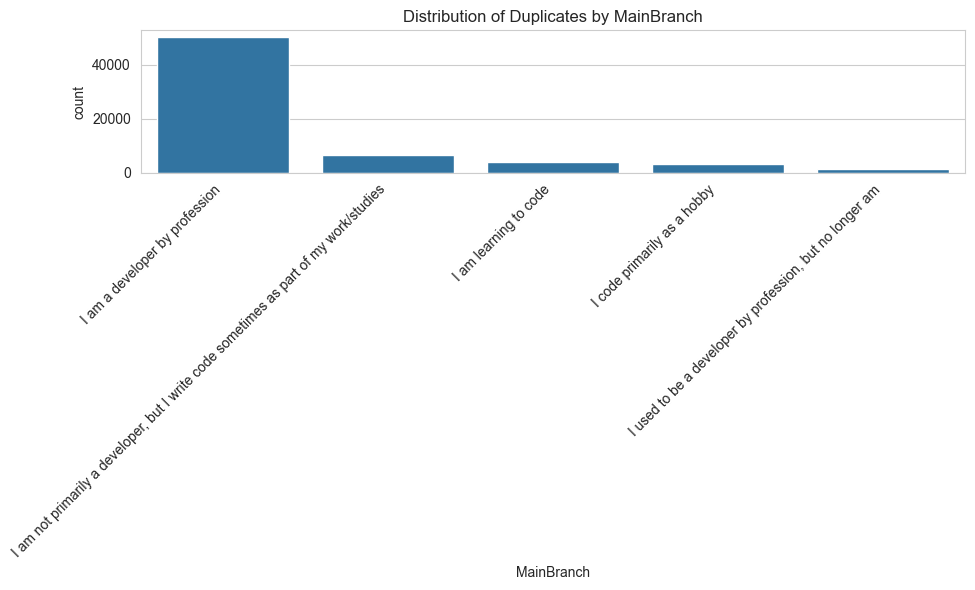

C:\Users\tdhoa\AppData\Local\Temp\ipykernel_22032\4229232792.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


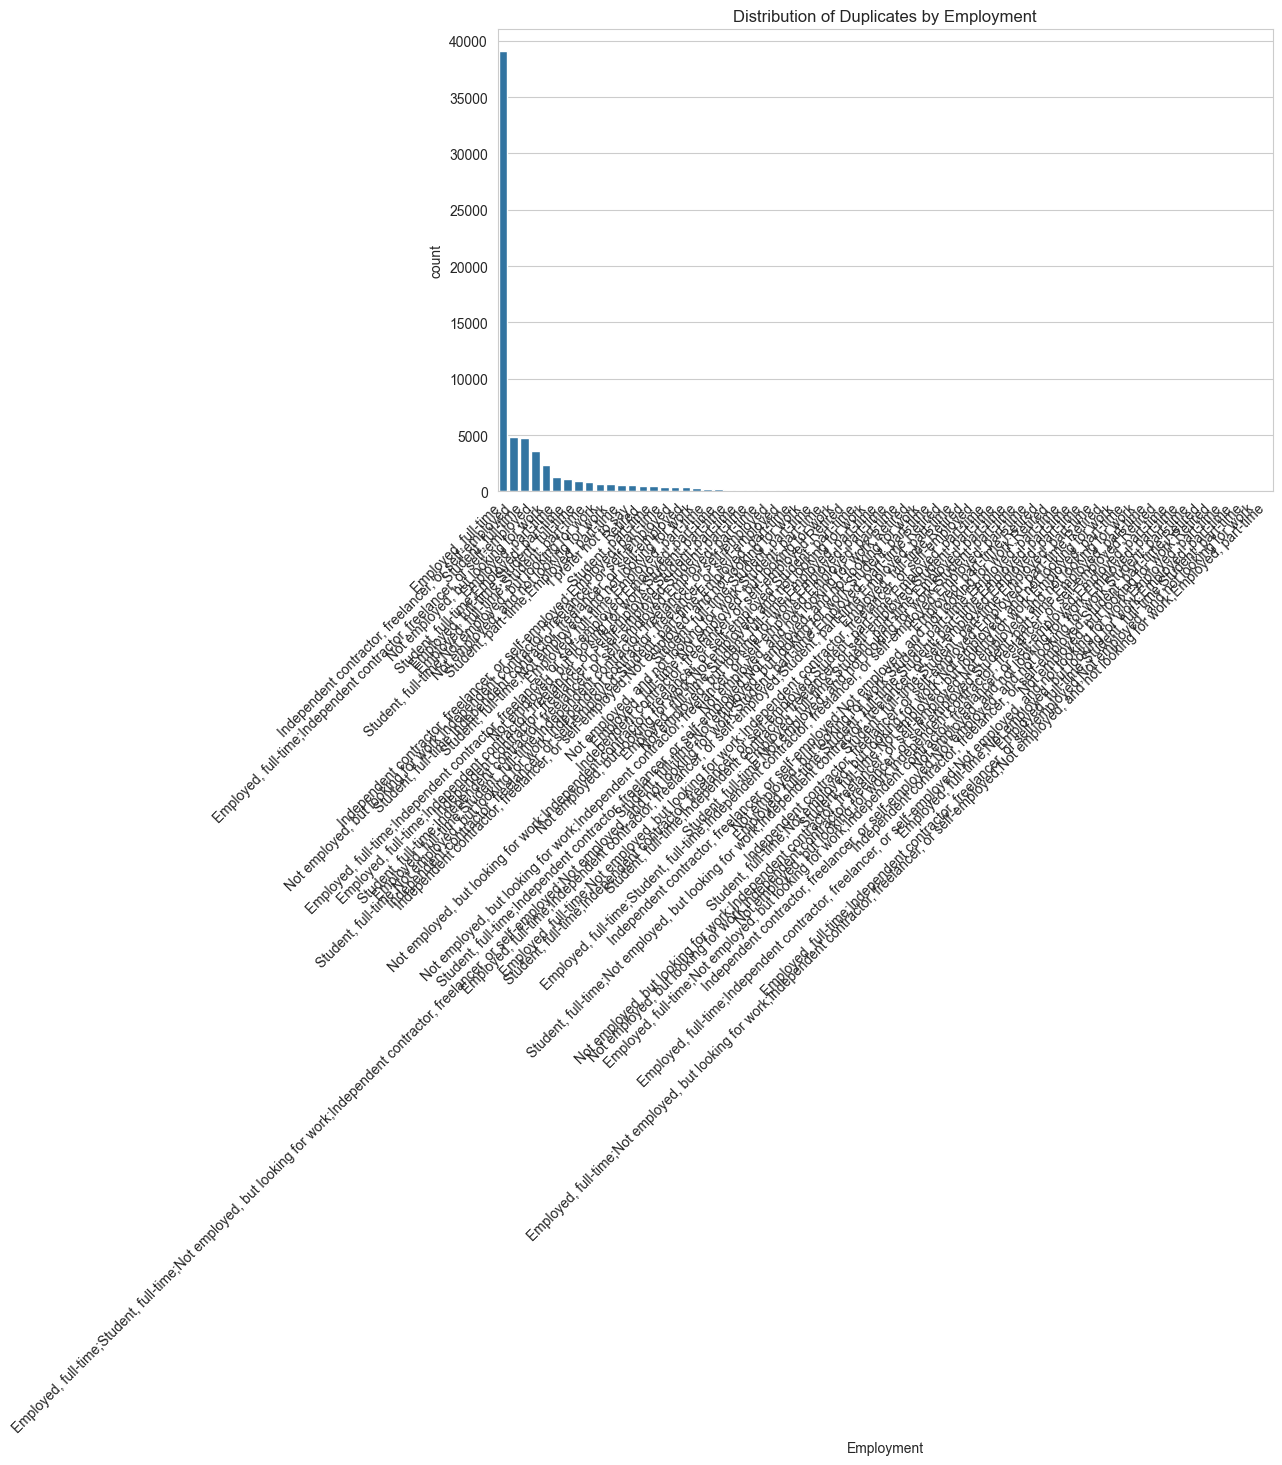

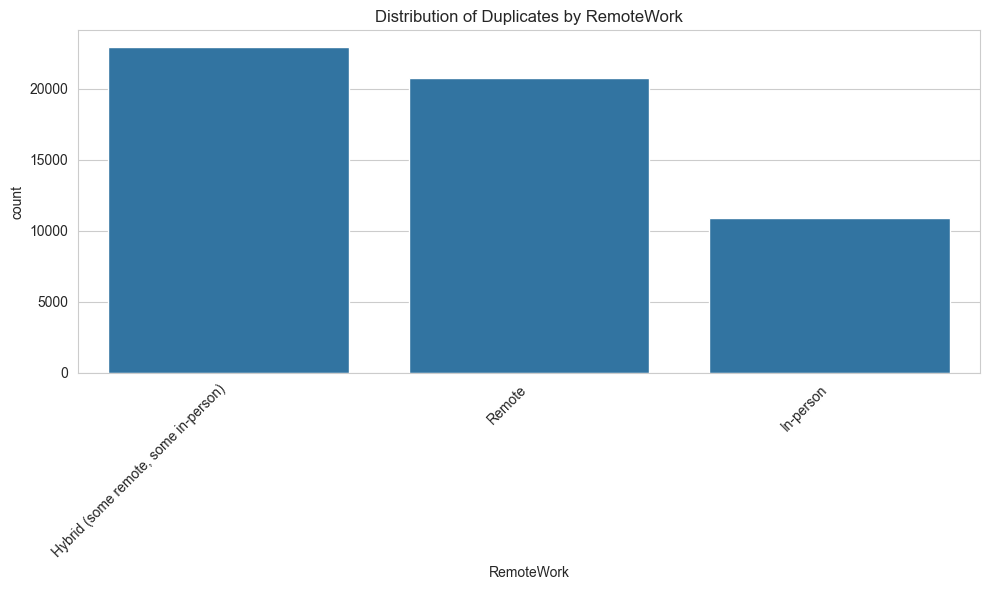

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# # 1. Countplot for Categorical Columns:

grouping_cols = ['MainBranch', 'Employment', 'RemoteWork']

for col in grouping_cols: 
    plt.figure(figsize=(10, 6))
    sns.countplot(data=duplicates, x=col, order=duplicates[col].value_counts().index) 
    plt.title(f'Distribution of Duplicates by {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.

C:\Users\tdhoa\AppData\Local\Temp\ipykernel_22032\2219013490.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


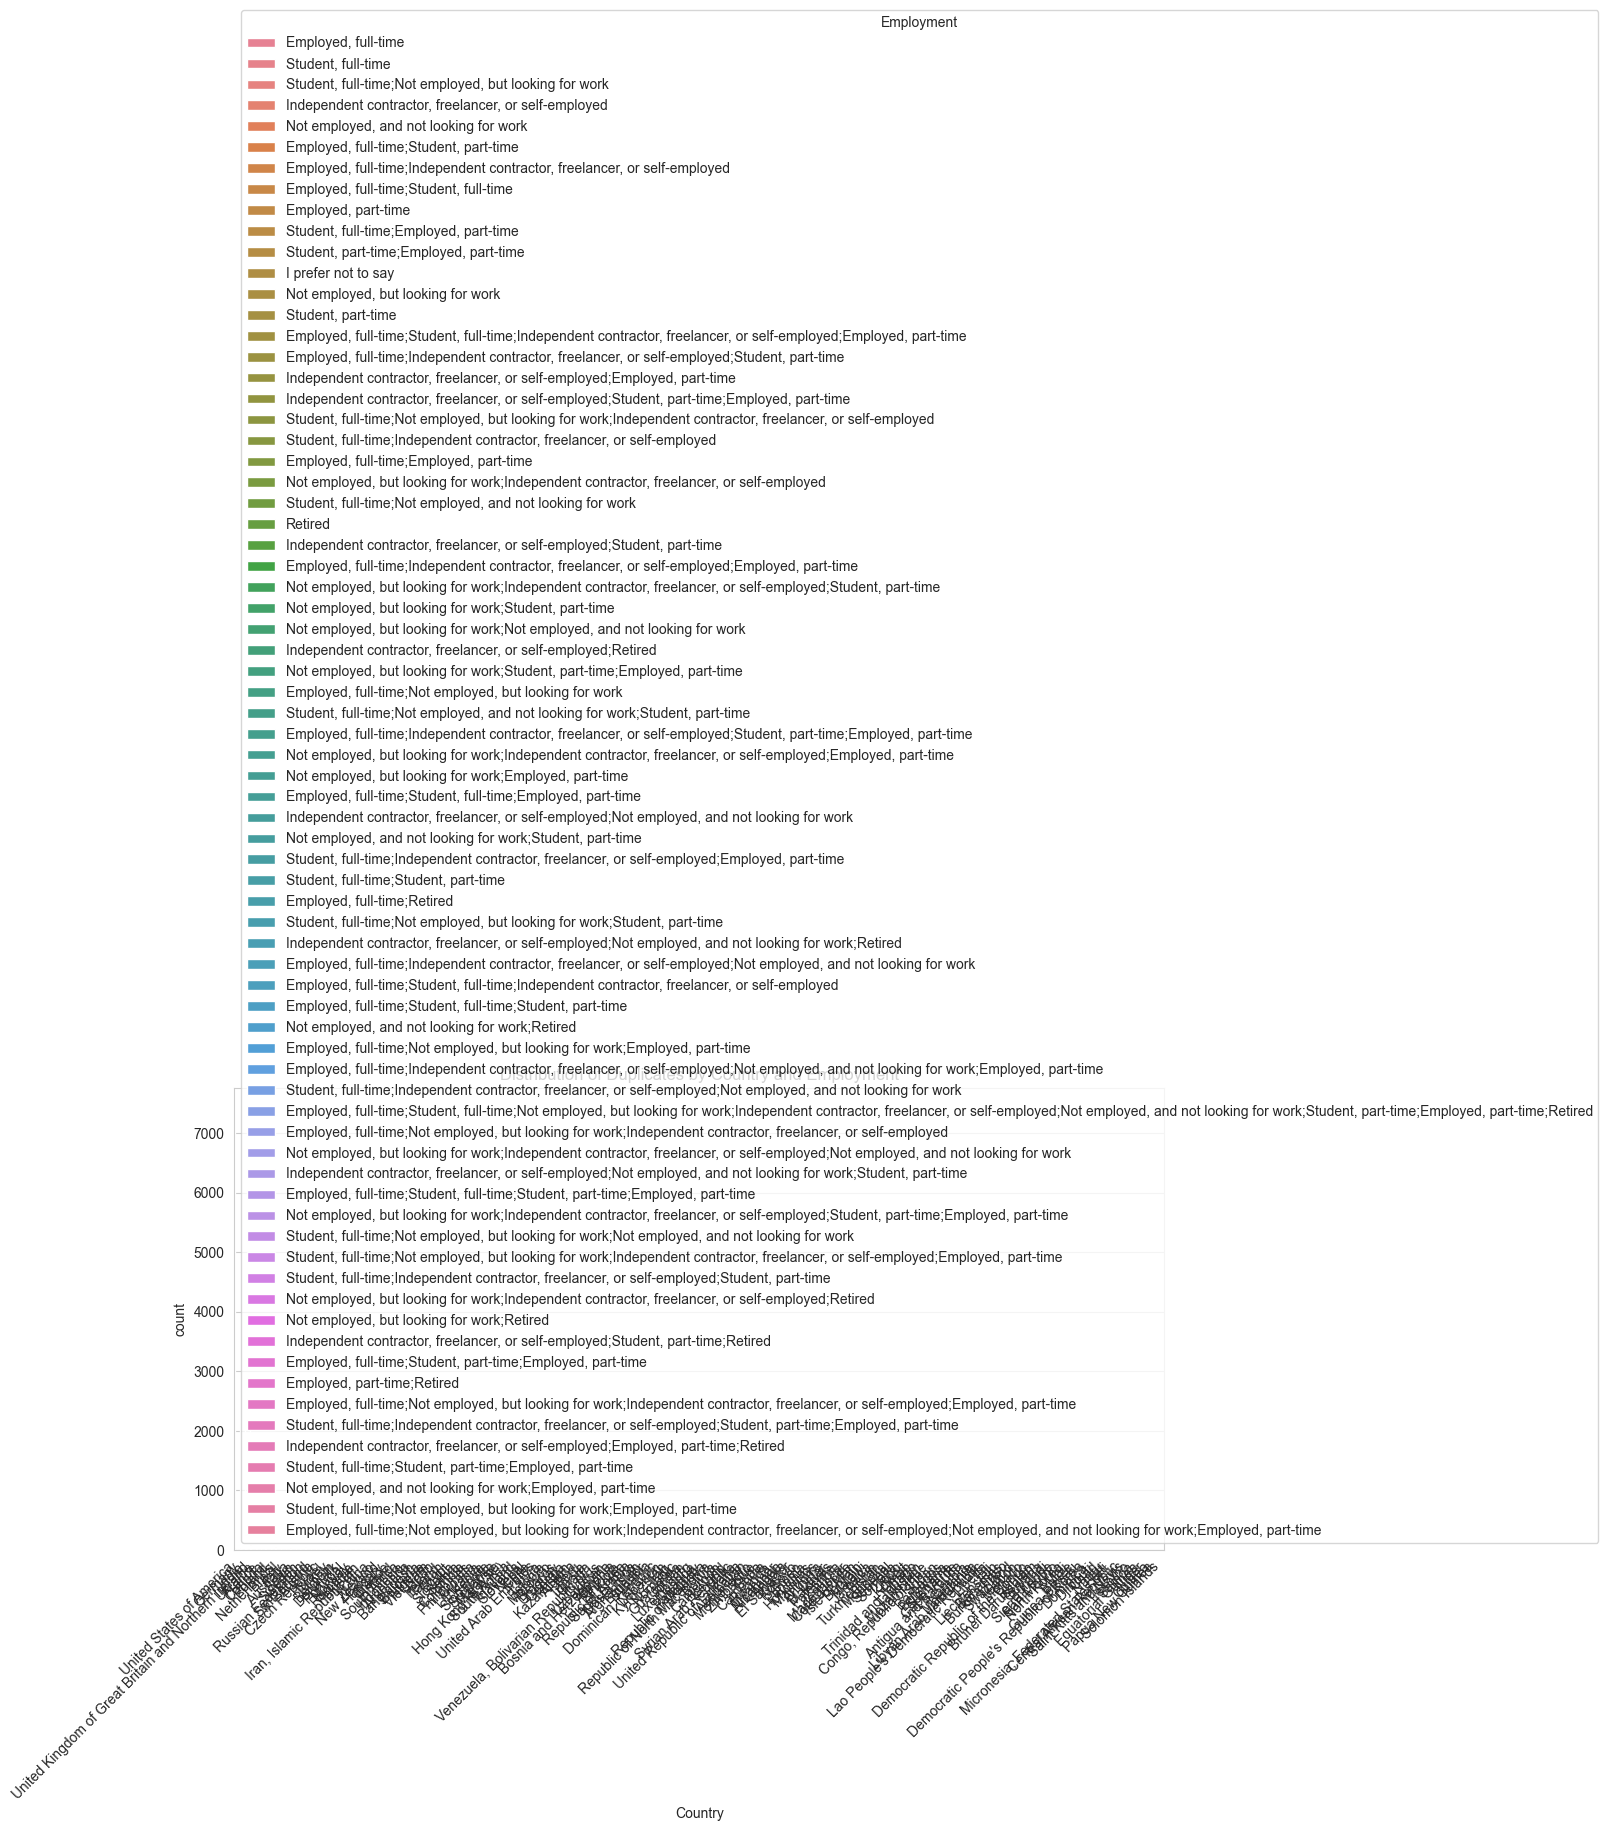

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ... (Your existing code to create the 'duplicates' DataFrame) ...

# 1. Bar Chart for Country and Employment:

plt.figure(figsize=(12, 6))
sns.countplot(data=duplicates, x='Country', hue='Employment', order=duplicates['Country'].value_counts().index)
plt.title('Distribution of Duplicates by Country and Employment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


Here's a strategic approach to removing duplicates, addressing the points you've raised:

**1. Defining Critical Columns for Uniqueness:**

* **Business Understanding:** The most crucial step is to leverage your domain knowledge or the context of your analysis.  Which columns truly define a unique entity or observation in your data? For example, in a customer database, 'CustomerID' might be the key, while in a product database, it might be 'ProductID' or a combination of 'ProductName' and 'Manufacturer'.
* **Functional Dependencies:** Identify functional dependencies. If the value of column A determines the value of column B, then B is functionally dependent on A. If A is your unique identifier, duplicates based on A should likely be removed.
* **Primary Keys (if applicable):** If your data originates from a relational database, the primary key is designed to ensure uniqueness.  Use this as your starting point.
* **Composite Keys:** Sometimes, uniqueness is determined by a combination of columns (a composite key). For example, a combination of 'FirstName', 'LastName', and 'DateOfBirth' might be needed to uniquely identify individuals.
* **Data Profiling:** Analyze the data to see how many unique values each column has.  Columns with very few unique values are less likely to be critical for defining uniqueness on their own.


**2. Removing Duplicates Based on a Subset of Columns:**

Once you've identified the critical columns, you have several options for removing duplicates based on this subset:

* **`df.duplicated()` with `subset`:** Use the `subset` argument of the `duplicated()` method to specify the columns to consider for duplication. The `keep` argument controls which duplicate to keep (first, last, or False to keep none):

   ```python
   critical_cols = ['MainBranch', 'Employment', 'RemoteWork'] # Example
   df_deduplicated = df.drop_duplicates(subset=critical_cols, keep='first') # Keep the first occurrence
   # Or keep='last' for the last, or keep=False to remove all duplicates.
   ```

* **`df.groupby()` and Aggregation:** If you need to retain some information from the duplicate rows, use `groupby()` and an aggregation function (e.g., `sum`, `mean`, `max`, a custom function):

   ```python
   df_deduplicated = df.groupby(critical_cols).agg({'OtherColumn1': 'sum', 'OtherColumn2': 'mean'}).reset_index()

   # Custom aggregation using lambda function
   df_deduplicated = df.groupby(critical_cols).agg({'OtherColumn1': lambda x: ','.join(x.astype(str))}).reset_index()  # e.g., merging strings into a single comma-separated string.

   ```

* **Custom Deduplication Logic:** For complex scenarios, you might need to write custom functions using `apply()` or other methods to implement your deduplication rules:


**Example: Custom Deduplication Based on Priority:**

Let's say you want to keep the row with the highest value in a 'Priority' column among duplicates:

```python
def deduplicate_by_priority(group):
    return group.loc[group['Priority'].idxmax()]

critical_cols = ['col1', 'col2'] # your main columns here
df_deduplicated = df.groupby(critical_cols).apply(deduplicate_by_priority).reset_index(drop=True)

```


**Important Considerations:**

* **Testing:**  Test your deduplication logic thoroughly on a small sample of your data first to ensure it behaves as expected.
* **Documentation:** Clearly document which columns were used for deduplication and the logic applied. This is essential for reproducibility and understanding your data processing steps.
* **Backup:**  Always keep a backup of your original data before performing any deduplication.


By following this strategic approach, combining domain knowledge with the appropriate Pandas techniques, you can effectively remove duplicates while preserving the integrity and meaning of your data.  Remember to carefully consider which columns truly define uniqueness in your specific context and choose the deduplication method that best suits your needs.


In [30]:
critical_cols = ['MainBranch', 'Employment', 'RemoteWork'] # Example
df_deduplicated = df.drop_duplicates(subset=critical_cols, keep='first') # Keep the first occurrence
# Or keep='last' for the last, or keep=False to remove all duplicates.

Here's how you can effectively verify and document your duplicate removal process, focusing on the aspects you've mentioned:

**1. Documenting the Process:**

Create a clear and concise record of your deduplication steps. This documentation should be understandable by others (or yourself in the future) and reproducible. Include the following:

* **Data Source:** Specify the original source of the data (file name, database table, etc.).
* **Date and Time:** Record the date and time of the deduplication process.
* **Deduplication Criteria:**  Clearly state the columns used to identify duplicates (in your case, `['MainBranch', 'Employment', 'RemoteWork']`).
* **Method Used:** Describe the Pandas method used for removing duplicates (e.g., `df.drop_duplicates(subset=..., keep=...)` or `df.groupby(...)` with aggregation).  If you used custom logic, provide the code or a detailed explanation.
* **`keep` Argument (if applicable):**  If using `drop_duplicates()`, specify the value of the `keep` argument ('first', 'last', or False) and explain why that choice was made.
* **Number of Duplicates Removed:**  Calculate and record the number of duplicate rows removed.  This is crucial for understanding the impact of the deduplication process:

   ```python
   original_rows = len(df)
   deduplicated_rows = len(df_deduplicated)
   duplicates_removed = original_rows - deduplicated_rows
   print(f"Number of duplicates removed: {duplicates_removed}")
   ```

* **Code Snippet (Recommended):**  Include the actual code used for deduplication. This is the most reliable way to ensure reproducibility.
* **Output or Summary Statistics (Optional):**  If relevant, include some summary statistics or a small sample of the deduplicated data to demonstrate the effect of the deduplication.



**2. Explaining the Reasoning:**

Provide a clear justification for selecting the specific columns (`['MainBranch', 'Employment', 'RemoteWork']` in your example) for duplicate identification and removal.  This explanation should be based on your understanding of the data and the goals of your analysis:

* **Business Context:** Relate the column selection to the business context or the purpose of your analysis.  Explain why these columns are sufficient to define a unique entity or observation in your data. For instance: "These columns were chosen because they represent the core attributes of a developer role and accurately capture the essential employment and work setup characteristics that define distinct opportunities in our database, even if additional details vary."
* **Functional Dependencies (if applicable):**  Explain any functional dependencies that influenced your decision. For example, "If two entries have the same 'MainBranch', 'Employment', and 'RemoteWork', it's highly likely that other columns like 'JobDescription' or 'SalaryRange' will also be the same, indicating a duplicate job posting."
* **Primary or Composite Keys (if applicable):**  If you based your decision on existing primary or composite keys, state this clearly.


**Example Documentation:**

```
Data Deduplication Report

Data Source:  jobs.csv
Date/Time: 2024-08-08 15:30
Deduplication Criteria: ['MainBranch', 'Employment', 'RemoteWork']
Method Used: df.drop_duplicates(subset=critical_cols, keep='first')
Reason for 'keep':  We kept the first occurrence of each duplicate as we assumed earlier entries might be more relevant.
Number of duplicates removed: 152

Code:
```python
critical_cols = ['MainBranch', 'Employment', 'RemoteWork']
df_deduplicated = df.drop_duplicates(subset=critical_cols, keep='first')
```

Reasoning:

These three columns ('MainBranch', 'Employment', 'RemoteWork') were selected as the deduplication criteria because they define the key characteristics of a developer role. We determined that rows with identical values for these columns likely represent duplicate job postings, even if other details like 'JobDescription' or 'SalaryRange' vary slightly. This approach ensures that we retain distinct job opportunities while removing redundant entries from our dataset.
```

**Where to Document:**

* **Code Comments:** For smaller projects, detailed comments within your code can be sufficient.
* **Separate Documentation File:** For larger projects or collaborative work, create a dedicated document (e.g., a Markdown file, a Word document, or a section in a Jupyter Notebook) to record the deduplication process.
* **Data Dictionary/Schema:** If you maintain a data dictionary or schema, include the deduplication information there as well.


By following these guidelines, you'll ensure that your duplicate removal process is well-documented, verifiable, and reproducible, enhancing the reliability and trustworthiness of your data analysis.


In [32]:
original_rows = len(df)
deduplicated_rows = len(df_deduplicated)
duplicates_removed = original_rows - deduplicated_rows
print(f"Number of original rows: {original_rows}")
print(f"Number of duplicates removed: {duplicates_removed}")

Number of original rows: 65457
Number of duplicates removed: 64896


1. Document the process of identifying and removing duplicates.

- Data Source: "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv".
- Date and Time: Record the date and time of the deduplication process.
- Deduplication Criteria: the columns used to identify duplicates (in your case, `['MainBranch', 'Employment', 'RemoteWork']`).
- Method Used: Describe the Pandas method used for removing duplicates: `df.drop_duplicates(subset=..., keep='first')
- Number of Duplicates Removed: Calculate and record the number of duplicate rows removed:
    + Number of original rows: 65457
    + Number of duplicates removed: 64896

- Code Snippet (Recommended):


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.

These columns were chosen because they represent the core attributes of a developer role and accurately capture the essential employment and work setup characteristics that define distinct opportunities in our database, even if additional details vary.